In [2]:
"""
This function gives the indices of valid neighbour of point i,j in 2d array my_array.The valid point is one which lies inside the 2d array and contains the desired value (default=1).It stores valid pairs in the list nvalid. 
"""
def getNeibours(i,j,my_array,nvalid,value=1):
    #print('inside getneibour')
    row_len=len(my_array)
    #print("row_len\t",row_len)
    col_len=len(my_array[0])
    #print("col_len\t",col_len)
    for m in range(i-1,i+2):
        #print("inside m loop")
        #print("m\t",m)
        if(m<0 or m>=row_len):continue #valid row
        for n in range(j-1,j+2):
            #print("inside n loop")
            #print("n\t",n)
            if (n<0 or n>=col_len):continue #valid column
            if (my_array[m][n]!=value):continue #check if the value in the point is desired
            if ((m,n) not in nvalid):
                nvalid.append((m,n)) #store the valid point in the list
                my_array[m][n]=0     #visited point to 0
                getNeibours(m,n,my_array,nvalid) #again search and test the neighbor for this valid point
    return nvalid

In [3]:
"""Returns the first indices i,j in the given 2d array which contains the given value"""

def get_first_index(my_array,value=1):
    for i in range(len(my_array)): #len(list)->row, len(list[0])->column
        for j in range(len(my_array[0])):
            if(my_array[i][j]==value):
                return i,j

In [4]:
"""reads the given numpy array in the form of 1's and 0's and stores the mean of indices of the valid neighbours in each group in the form of 2d array"""

def xymeanarray(my_array,allx,ally):    
    xmean=[] #stores all the x-values
    ymean=[] #stors all the y-values
    #allx stors xmean list from indivial array
    #ally stores ymean list from individual array
    while(True):
        a=[] #for storing the valid points
        print("=====================")
        print("operating array\n",my_array)
        if(np.sum(my_array)==0):break #if total sum of array is 0, it is done
        m,n=get_first_index(my_array) #get the first indices for the value=1 as tuple
        print("first indices\t",m,"\t",n)
        combined=(getNeibours(m,n,my_array,a))  #store the valid members as the list of tuple
        x=[i[0] for i in combined]  #get first index in the tuple and store in the list
        y=[i[1] for i in combined]  #get the second index in the tuple and store in the list
        print("x\t",x)
        print("y\t",y)
        xmean.append(round(mean(x),2)) #for mean import mean from statistics
        ymean.append(round(mean(y),2))
        print("getNeighbour\n",combined)
        #print(my_array)
        #k=k+1
        print("====================")
        print("xmean\t",xmean)
        print("ymean\t",ymean)
    allx.append(xmean) #append xmean list
    ally.append(ymean) #append ymean list
    #plt.plot(xmean,ymean)
    print("###########################################################################################")
    print("x-list\n",allx)
    print("y-list\n",ally)

In [5]:
"""This function reads the file and stores the x-mean and y-mean of each group in two different 2d arrays"""
import numpy as np
import pandas as pd
from statistics import mean
import sys
sys.setrecursionlimit(100000) # this will prevent the error in recursion

def read_files(filename,xmeanlist,ymeanlist):
    df=pd.read_csv(filename) #input file as panda dataframe
    my_array=np.array(df)    #dataframe to numpy array
    my_array=my_array[511:767] #check this range
    my_array[(my_array>1) | (my_array<1)]=0 # 0 if value<1 or value>1
    print("original array\n",my_array)
    xymeanarray(my_array,xmeanlist,ymeanlist)
    
#define two empty list which stores the x-mean and y-mean as the list from each file
xmeanlist=[]
ymeanlist=[]
filename=['m000017.csv','m000067.csv'] #file or list of files
for i in filename:
    print("reading file \t",i)
    print('***********************************************************')
    read_files(i,xmeanlist,ymeanlist)
    print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@successful@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@2")

reading file 	 m000017.csv
***********************************************************
original array
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
operating array
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
first indices	 58 	 247
x	 [58, 59, 60, 59, 60, 59, 60, 60, 60, 59, 60, 60, 61, 61, 62, 61, 62, 61, 62, 62, 62, 63, 63, 63, 64, 64, 64, 64, 63, 63, 63, 62, 63, 63, 62, 63, 63, 62, 62, 61, 61, 61, 61, 61, 61, 60, 61, 61, 60, 61, 61, 60, 60, 59, 58, 59, 58, 59, 58, 59, 59, 58, 59, 59, 58, 59, 58, 59, 58, 59, 58, 59, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 61, 61, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 63, 63, 64, 64, 64, 64, 64, 64, 64, 65, 65, 65, 65, 65, 66, 66, 66, 67, 67, 67, 67, 66, 66, 66, 66, 66, 65, 65, 65, 65, 65, 65, 65, 64, 64, 

first indices	 161 	 328
x	 [161]
y	 [328]
getNeighbour
 [(161, 328)]
xmean	 [82.07, 107, 114, 124, 127.23, 127.46, 146.5, 154.18, 161]
ymean	 [262.89, 168, 362.5, 401, 428.29, 86.67, 332, 330.73, 328]
operating array
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
first indices	 169 	 198
x	 [169, 170, 170, 170, 169, 170, 170, 170, 170, 171, 171, 171, 171, 171, 171, 171, 172, 172, 172, 172, 172, 172, 171, 171, 171, 171, 171, 172, 172, 172, 172, 173, 173, 173, 173, 173, 173, 174, 174, 174, 174, 174, 173, 173, 173, 173, 172, 172, 172, 173, 173, 174, 174, 174, 174, 175, 175, 175, 175, 175, 176, 176, 176, 176, 175, 175, 175, 175, 174, 174, 173, 173, 173, 174, 174, 175, 175, 176, 176, 176, 176, 177, 177, 178, 178, 177, 177, 177, 177, 176, 176, 175, 175, 174, 174, 174, 174, 175, 175, 175, 176, 176, 177, 177, 178, 178, 178, 178, 179, 179, 179, 179, 179, 178, 178, 177, 177, 176, 176, 1

original array
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
operating array
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
first indices	 59 	 264
x	 [59, 59, 59, 60, 60, 60, 61, 60, 60, 61, 61, 61, 62, 61, 62, 62, 62, 62, 61, 62, 61, 62, 62, 62, 63, 63, 63, 62, 63, 63, 62, 63, 63, 63, 63, 63, 62, 63, 63, 62, 62, 62, 61, 61, 62, 62, 62, 61, 61, 61, 60, 60, 60, 59, 59, 60, 60, 60, 60, 60, 59, 59, 60, 60, 60, 59, 59, 60, 60, 60, 59, 60, 60, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 60, 60, 60, 60, 60, 60, 60, 60, 60, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 62, 62, 62, 63, 63, 63, 63, 63, 63, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 63, 64, 65, 65, 65, 66, 66, 67, 67, 66, 66, 66, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 64,

In [6]:
xmeanlist

[[82.07, 107, 114, 124, 127.23, 127.46, 146.5, 154.18, 161, 186.33],
 [119.95, 83.79, 104, 127.29, 152, 193.95, 185.5, 198.12]]

In [7]:
#getting the x-values in the particular column if the value is not missing
print("xmeanlist\n",xmeanlist)
meanxdf=pd.DataFrame(xmeanlist)
print("meanxdf\n",meanxdf)
meanxdfnona=meanxdf.dropna(axis=1) #removes the column with missing value
print("meanxdfnona\n",meanxdfnona)
x1list=list(meanxdfnona.iloc[:,0]) #list of first column i.e.x1
print("x1list\n",x1list)
meanxdf

xmeanlist
 [[82.07, 107, 114, 124, 127.23, 127.46, 146.5, 154.18, 161, 186.33], [119.95, 83.79, 104, 127.29, 152, 193.95, 185.5, 198.12]]
meanxdf
         0       1    2       3       4       5      6       7      8       9
0   82.07  107.00  114  124.00  127.23  127.46  146.5  154.18  161.0  186.33
1  119.95   83.79  104  127.29  152.00  193.95  185.5  198.12    NaN     NaN
meanxdfnona
         0       1    2       3       4       5      6       7
0   82.07  107.00  114  124.00  127.23  127.46  146.5  154.18
1  119.95   83.79  104  127.29  152.00  193.95  185.5  198.12
x1list
 [82.07, 119.95]


,0,1,2,3,4,5,6,7,8,9
0,82.07,107.00,114,124.00,127.23,127.46,146.5,154.18,161.0,186.33
1,119.95,83.79,104,127.29,152.00,193.95,185.5,198.12,NaN,NaN


In [18]:
#getting the y-values in the particular column if the value is not missing
print("ymeanlist\n",ymeanlist)
meanydf=pd.DataFrame(ymeanlist)
print("meanydf\n",meanydf)
meanydfnona=meanydf.dropna(axis=1) #removes the column with missing value
print("meanydfnona\n",meanydfnona)
y1list=list(meanydfnona.iloc[:,0]) #list of first column i.e.x1
print("y1list\n",y1list)
meanydf

ymeanlist
 [[262.89, 168, 362.5, 401, 428.29, 86.67, 332, 330.73, 328, 247.92], [213.4, 332.51, 352.62, 464.42, 12, 275.72, 326.83, 300.88]]
meanydf
         0       1       2       3       4       5       6       7      8  \
0  262.89  168.00  362.50  401.00  428.29   86.67  332.00  330.73  328.0   
1  213.40  332.51  352.62  464.42   12.00  275.72  326.83  300.88    NaN   

        9  
0  247.92  
1     NaN  
meanydfnona
         0       1       2       3       4       5       6       7
0  262.89  168.00  362.50  401.00  428.29   86.67  332.00  330.73
1  213.40  332.51  352.62  464.42   12.00  275.72  326.83  300.88
y1list
 [262.89, 213.4]


,0,1,2,3,4,5,6,7,8,9
0,262.89,168.00,362.50,401.00,428.29,86.67,332.00,330.73,328.0,247.92
1,213.40,332.51,352.62,464.42,12.00,275.72,326.83,300.88,NaN,NaN


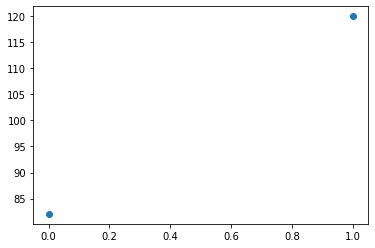

In [9]:
#plotging x1's 
import matplotlib.pyplot as plt
plt.plot(x1list,'o')
plt.show()

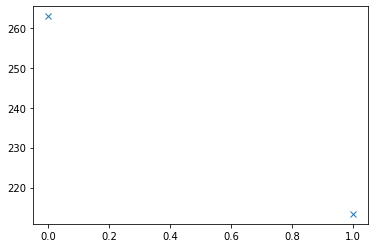

In [10]:
#plotting y1's 
plt.plot(y1list,'x')
plt.show()

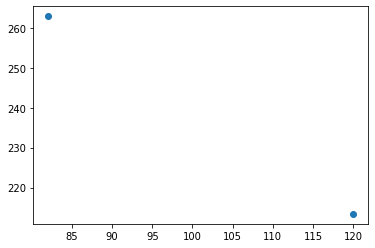

In [11]:
#plot x1 vs y1
plt.plot(x1list,y1list,'o')
plt.show()

In [38]:
meanxdfnona #dataframe
cols=meanxdfnona.shape[1] #number of columns
colname=[("x"+str(i+1)) for i in range(cols)]
meanxdfnona.columns=[colname]
meanxdfnona

,x1,x2,x3,x4,x5,x6,x7,x8
0,82.07,107.00,114,124.00,127.23,127.46,146.5,154.18
1,119.95,83.79,104,127.29,152.00,193.95,185.5,198.12


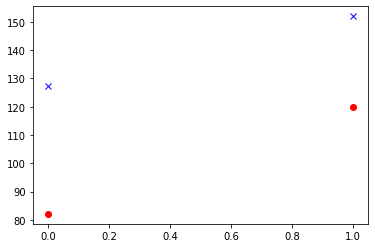

In [41]:
plt.plot(meanxdfnona.x1,'ro')
plt.plot(meanxdfnona.x5,'bx')